✅ File Loaded Successfully
Shape before cleaning: (370, 28)
Columns before rename:
['ID', 'Age', 'I receive hurtful or insulting messages\n', '\xa0I have been publicly embarrassed or humiliated on social media\n', '\xa0I avoid certain apps or people online due to negative experiences.\n\n', '\xa0I have seen false information or rumors spread about me\n', 'I often feel anxious, angry, or upset after using social media.\n\n', '\xa0I sleep at least 7 hours most nights.\n\n', 'I fall asleep easily without stress or anxiety.\n', 'I wake up feeling refreshed and energetic.\n\n', 'My sleep is rarely disturbed by phone use or notifications.\n\n', 'I feel well-rested throughout the day.\n\n', '\xa0I eat three balanced meals per day.\n\n', '\xa0I include fruits, vegetables, and protein in my meals.\n\n', '\xa0I avoid skipping meals due to stress or screen time.\n\n', '\xa0I limit junk food and sugary drinks', 'I drink enough water daily.\n\n', '\xa0I exercise or walk at least 3 times a week.\n',

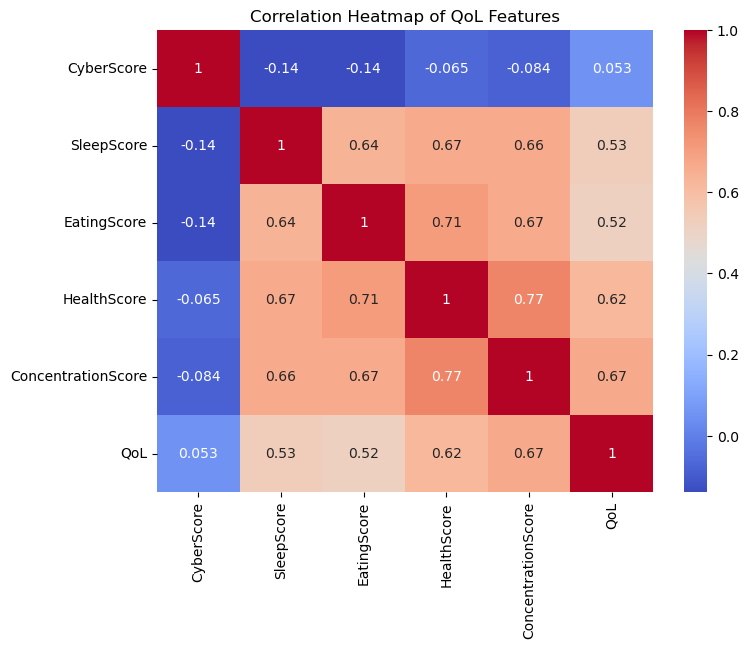

🎯 Data Cleaning & Preparation Complete!
✅ Baseline results:
                         Model        R²       MAE      RMSE
8                         KNN  0.485908  1.304645  1.864382
6                     XGBoost  0.429513  1.341140  1.963982
4               Random Forest  0.426744  1.314707  1.968743
1            Ridge Regression  0.419393  1.343058  1.981326
0           Linear Regression  0.419283  1.343052  1.981514
9  Polynomial Regression (2°)  0.417705  1.422800  1.984204
2            Lasso Regression  0.417392  1.364834  1.984737
5           Gradient Boosting  0.414137  1.390151  1.990273
3               Decision Tree  0.385471  1.391523  2.038384
7                         SVR  0.353079  1.424807  2.091415


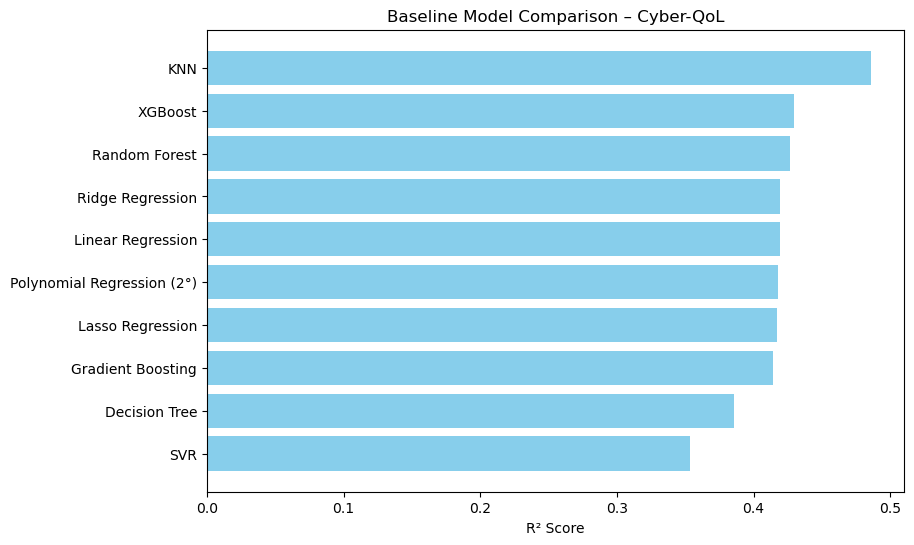

Top baseline model → KNN


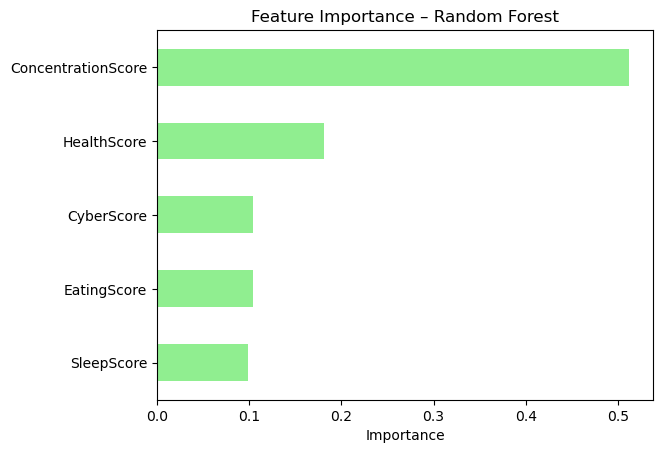


================ QoL Prediction Formula ================

Intercept (b0): 0.7363922302967536

Coefficients (b1 to b5):
CyberScore: 0.10482185887180542
SleepScore: 0.09265133609375416
EatingScore: -0.010055303656351459
HealthScore: 0.24547727467893535
ConcentrationScore: 0.5020652173467202


QoL = b0 + 0.10482185887180542*(CyberScore) + 0.09265133609375416*(SleepScore) - 0.010055303656351459*(EatingScore) + 0.24547727467893535*(HealthScore) + 0.5020652173467202*(ConcentrationScore)

SST: 500.3351295989156
SSR: 236.63332586667457
SSE: 290.5533566326797

R² (using ANOVA): 0.4729496528783963


In [3]:
# ------------------------------
# CYBER-QoL Data Cleaning Script
# ------------------------------


import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# ------------------------------
# STEP 1: LOAD YOUR EXCEL FILE
# ------------------------------
# Replace filename with your actual Excel file name
df = pd.read_excel("C:/Users/ssree/OneDrive/ドキュメント/responses.xlsx")

print("✅ File Loaded Successfully")
print("Shape before cleaning:", df.shape)
print("Columns before rename:")
print(df.columns.tolist())
print("-" * 60)

# ------------------------------
# STEP 2: RENAME COLUMNS
# ------------------------------
df = df.rename(columns={
    # Cyberbullying
    'I receive hurtful or insulting messages': 'Cyber1',
    'I have been publicly embarrassed or humiliated on social media': 'Cyber2',
    'I have seen false information or rumors spread about me.': 'Cyber3',
    'I often feel anxious, angry, or upset after using social media.': 'Cyber4',
    'I avoid certain apps or people online due to negative experiences.': 'Cyber5',

    # Sleep
    'I sleep at least 7 hours most nights.': 'Sleep1',
    'I fall asleep easily without stress or anxiety.': 'Sleep2',
    'I wake up feeling refreshed and energetic.': 'Sleep3',
    'My sleep is rarely disturbed by phone use or notifications.': 'Sleep4',
    'I feel well-rested throughout the day.': 'Sleep5',

    # Eating
    'I eat three balanced meals per day.': 'Eating1',
    'I include fruits, vegetables, and protein in my meals.': 'Eating2',
    'I avoid skipping meals due to stress or screen time.': 'Eating3',
    'I limit junk food and sugary drinks': 'Eating4',
    'I drink enough water daily.': 'Eating5',

    # Health
    'I exercise or walk at least 3 times a week.': 'Health1',
    'I feel energetic and physically healthy.': 'Health2',
    'I rarely experience headaches, fatigue, or eye strain': 'Health3',
    'I am able to manage stress effectively.': 'Health4',
    'I feel emotionally balanced and mentally calm': 'Health5',

    # Concentration
    'I can focus on studies or work without distractions.': 'Con1',
    'My phone or social media use does not affect my productivity': 'Con2',
    'I can remember tasks and complete them on time.': 'Con3',
    'I feel mentally alert during the day.': 'Con4',
    'I can stay focused for long periods without losing interest': 'Con5',

    # QoL (target)
    'How satisfied are you with your overall quality of life right now?': 'QoL',

    # Optional fields (demographics)
    'Age': 'Age',
    'Gender': 'Gender',
    'Education level': 'Education',
    'Average screen time per day (in hours)': 'ScreenTime',
    'Social media platforms you use most often': 'SocialMedia'
})

print("✅ Columns renamed successfully")

# ------------------------------
# STEP 3: DEFINE RATING COLUMNS
# ------------------------------
# --------------------------------------------------
# CLEAN AND RENAME COLUMN HEADERS (ONE-SHOT SOLUTION)
# --------------------------------------------------
import re

# Strip quotes / newlines / nbsp and trim
df.columns = (
    df.columns
      .str.replace(r'[\n\r"]', '', regex=True)
      .str.replace(r'\xa0', ' ', regex=True)
      .str.strip()
)

# Build a simple manual rename map using "starts with" fragments
rename_map = {}
for col in df.columns:
    c = col.lower()
    if c.startswith('i receive hurtful'): rename_map[col] = 'Cyber1'
    elif 'embarrassed' in c: rename_map[col] = 'Cyber2'
    elif 'avoid certain apps' in c: rename_map[col] = 'Cyber3'
    elif 'false information' in c: rename_map[col] = 'Cyber4'
    elif 'anxious' in c: rename_map[col] = 'Cyber5'
    elif 'sleep at least' in c: rename_map[col] = 'Sleep1'
    elif 'fall asleep' in c: rename_map[col] = 'Sleep2'
    elif 'wake up' in c: rename_map[col] = 'Sleep3'
    elif 'sleep is rarely' in c: rename_map[col] = 'Sleep4'
    elif 'well-rested' in c: rename_map[col] = 'Sleep5'
    elif 'balanced meals' in c: rename_map[col] = 'Eating1'
    elif 'fruits' in c: rename_map[col] = 'Eating2'
    elif 'avoid skipping' in c: rename_map[col] = 'Eating3'
    elif 'junk food' in c: rename_map[col] = 'Eating4'
    elif 'drink enough' in c: rename_map[col] = 'Eating5'
    elif 'exercise' in c: rename_map[col] = 'Health1'
    elif 'energetic' in c and 'sleep' not in c: rename_map[col] = 'Health2'
    elif 'headaches' in c: rename_map[col] = 'Health3'
    elif 'manage stress' in c: rename_map[col] = 'Health4'
    elif 'emotionally balanced' in c: rename_map[col] = 'Health5'
    elif 'focus on studies' in c: rename_map[col] = 'Con1'
    elif 'productivity' in c: rename_map[col] = 'Con2'
    elif 'remember tasks' in c: rename_map[col] = 'Con3'
    elif 'mentally alert' in c: rename_map[col] = 'Con4'
    elif 'stay focused' in c: rename_map[col] = 'Con5'
    elif 'quality of life' in c: rename_map[col] = 'QoL'

df.rename(columns=rename_map, inplace=True)

print("✅ Columns now renamed to short codes:")
print([c for c in df.columns if c.startswith(('Cyber','Sleep','Eating','Health','Con')) or c=='QoL'])
rating_cols = [f'Cyber{i}' for i in range(1,6)] + \
              [f'Sleep{i}' for i in range(1,6)] + \
              [f'Eating{i}' for i in range(1,6)] + \
              [f'Health{i}' for i in range(1,6)] + \
              [f'Con{i}' for i in range(1,6)] + ['QoL']

# ------------------------------
# STEP 4: VERIFY NUMERIC DATA
# ------------------------------

df[rating_cols] = df[rating_cols].apply(pd.to_numeric, errors='coerce')
print("✅ Verified numeric values (non-numeric turned to NaN if any)")

# ------------------------------
# STEP 5: HANDLE MISSING VALUES
# ------------------------------
# Drop rows where more than half of responses are missing
df = df.dropna(thresh=25)
# Fill small missing values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

print("✅ Missing values handled")
print("Shape after cleaning:", df.shape)

# ------------------------------
# STEP 6: REVERSE CYBERBULLYING SCORES
# ------------------------------
for i in range(1,6):
    df[f'Cyber{i}'] = 10 - df[f'Cyber{i}']

print("✅ Cyberbullying scores reversed")

# ------------------------------
# STEP 7: CREATE AVERAGE SCORES
# ------------------------------
df['CyberScore'] = df[[f'Cyber{i}' for i in range(1,6)]].mean(axis=1)
df['SleepScore'] = df[[f'Sleep{i}' for i in range(1,6)]].mean(axis=1)
df['EatingScore'] = df[[f'Eating{i}' for i in range(1,6)]].mean(axis=1)
df['HealthScore'] = df[[f'Health{i}' for i in range(1,6)]].mean(axis=1)
df['ConcentrationScore'] = df[[f'Con{i}' for i in range(1,6)]].mean(axis=1)

print("✅ Averages computed for each section")

# ------------------------------
# STEP 8: FINAL CLEAN DATASET
# ------------------------------
final_cols = ['CyberScore', 'SleepScore', 'EatingScore', 'HealthScore', 'ConcentrationScore', 'QoL']
df_final = df[final_cols].copy()

print("✅ Final dataset ready")
print(df_final.head())

# ------------------------------
# STEP 9: SAVE CLEANED DATA
# ------------------------------
df_final.to_excel("C:/Users/ssree/OneDrive/ドキュメント/responses_cleaned.xlsx", index=False, engine='openpyxl')
print("✅ Cleaned dataset saved as 'cleanedata.csv'")

# ------------------------------
# STEP 10: OPTIONAL – Check correlation
# ------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of QoL Features")
plt.show()

print("🎯 Data Cleaning & Preparation Complete!")
# ---------------------------------------------------------
# STEP 3 : BASELINE MODEL TRAINING & COMPARISON
# ---------------------------------------------------------


# -------------------------
# Load dataset (already cleaned)
# -------------------------
df = df_final.copy()

X = df[['CyberScore','SleepScore','EatingScore','HealthScore','ConcentrationScore']]
y = df['QoL']

# Split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# -------------------------
# Define baseline models
# -------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.1),
    "SVR": SVR(kernel='rbf'),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# -------------------------
# Train + evaluate
# -------------------------
results = []
for name, model in models.items():
    if name in ["SVR","KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    r2   = r2_score(y_test, y_pred)
    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append([name, r2, mae, rmse])

# Polynomial regression (2°)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test  = poly.transform(X_test_scaled)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)
results.append(["Polynomial Regression (2°)",
                r2_score(y_test, y_pred_poly),
                mean_absolute_error(y_test, y_pred_poly),
                np.sqrt(mean_squared_error(y_test, y_pred_poly))])

# -------------------------
# Results table
# -------------------------
results_df = pd.DataFrame(results, columns=["Model","R²","MAE","RMSE"]).sort_values(by="R²", ascending=False)
print("✅ Baseline results:\n", results_df)

# Bar chart
plt.figure(figsize=(9,6))
plt.barh(results_df["Model"], results_df["R²"], color="skyblue")
plt.xlabel("R² Score")
plt.title("Baseline Model Comparison – Cyber-QoL")
plt.gca().invert_yaxis()
plt.show()

# Identify best model
rf_best = results_df.iloc[0,0]
print(f"Top baseline model → {rf_best}")

# ---------------------------------------------------------
# -------------------------
# Feature importance (tree models)
# -------------------------

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

fi = pd.Series(rf_model.feature_importances_, index=X.columns)
fi.sort_values().plot(kind='barh', color='lightgreen')

plt.title("Feature Importance – Random Forest")
plt.xlabel("Importance")
plt.show()


# ---------------------------------------------------------
# STEP: GENERATE QoL FORMULA USING LINEAR REGRESSION
# ---------------------------------------------------------

# Train Linear Regression on original (unscaled) data
lr_formula = LinearRegression()
lr_formula.fit(X_train, y_train)

print("\n================ QoL Prediction Formula ================\n")

print("Intercept (b0):", lr_formula.intercept_)
print("\nCoefficients (b1 to b5):")

for feature, coef in zip(X.columns, lr_formula.coef_):
    print(f"{feature}: {coef}")

print("\n========================================================")

# Build readable formula
print("\nQoL = b0", end="")

for feature, coef in zip(X.columns, lr_formula.coef_):
    sign = "+" if coef >= 0 else "-"
    print(f" {sign} {abs(coef)}*({feature})", end="")

print("\n\n========================================================")
# Predict values
y_pred = lr_formula.predict(X_test)

# Calculate SST (Total Sum of Squares)
y_mean = np.mean(y_test)
SST = np.sum((y_test - y_mean)**2)

# Calculate SSR (Regression Sum of Squares)
SSR = np.sum((y_pred - y_mean)**2)

# Calculate SSE (Error Sum of Squares)
SSE = np.sum((y_test - y_pred)**2)

# R2 using ANOVA formula
R2_anova = SSR / SST

print("SST:", SST)
print("SSR:", SSR)
print("SSE:", SSE)
print("\nR² (using ANOVA):", R2_anova)


